**ИТОГОВАЯ РАБОТА**

**1. Загрузите файл HR.csv в pandas dataframe.**

In [61]:
# Импортируем библиотеки.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal # пробовал для трех выборок по всем уровням зарплаты, результат аналогичный, время работы не зависит от уровня ЗП. Из работы удалил.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [2]:
# Читаем файл.

df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Смотрим информацию по датафрейму. Всё хорошо!

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).**

In [4]:
# Используем метод describe. Медиана = 50 процентиль.

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

In [5]:
# Рассчитываем корреляционную матрицу Пирсона.

corr_matrix_pearson = df[['satisfaction_level', 'last_evaluation', 'number_project',
                          'average_montly_hours', 'time_spend_company', 'Work_accident',
                          'left', 'promotion_last_5years']].corr()
corr_matrix_pearson

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


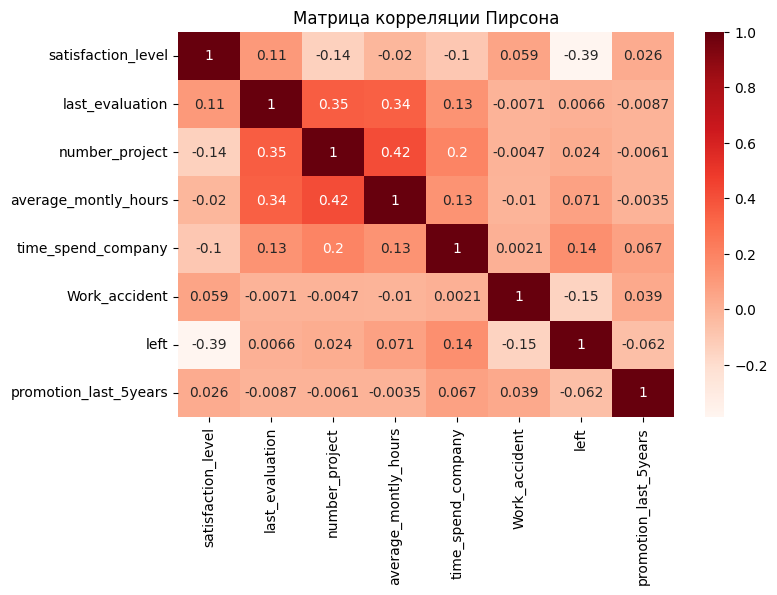

In [6]:
# Строим тепловую карту.

plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

На предоставленных данных двумя наиболее скоррелированными переменными являются number_project и average_montly_hours c коэффициентом корреляции 0,42.
Наименее скоррелированными являются satisfaction_level и left с коэффициентом корреляции -0,39.
В названии столбца average_mont(h)ly_hours ошибка в исходном CSV. Оставил как есть.


**4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [7]:
grouped = df.groupby('department')['left'].count
grouped()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

**5. Показать распределение сотрудников по зарплатам.**

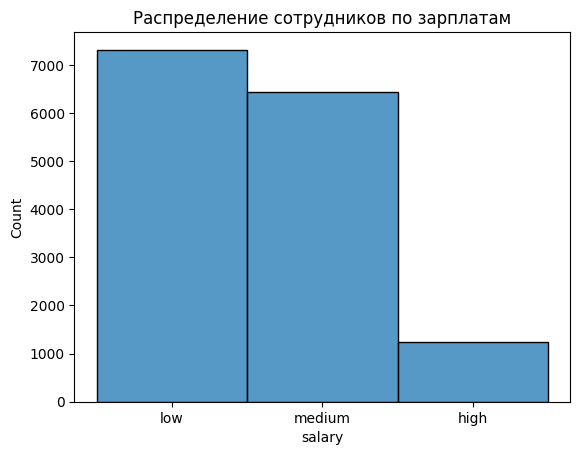

In [8]:
# Строим гистограмму.

sns.histplot(data=df, x='salary')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

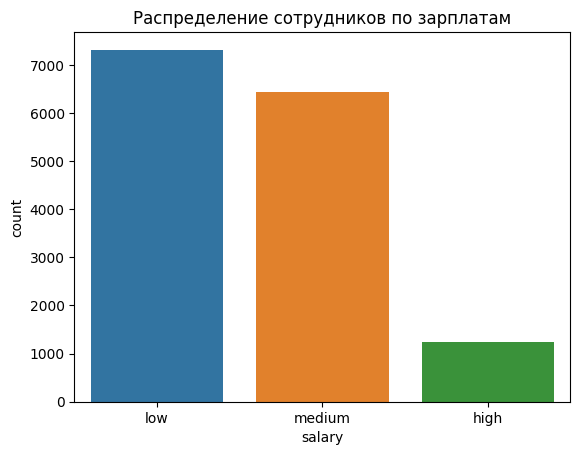

In [9]:
# Строим диаграмму.

sns.countplot(data=df, x='salary')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [10]:
# Количество сотрудников с разными зарплатами по отделам.

sd = df.groupby(['salary', 'department'])['department'].count()
sd

salary  department 
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
Name: department, dtype: int64

In [11]:
# Количество сотрудников с разными зарплатами по отделам.

ds = df.groupby(['department', 'salary'])['department'].count()
ds

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: department, dtype: int64

In [12]:
# Сводная таблица количества сотрудников по отделам и зарплатам.

dep_sal = pd.pivot_table(data=df, index='department', columns='salary', values='left', aggfunc='count')
dep_sal

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [13]:
# Сводная таблица количества сотрудников с разными зарплатами по отделам.

sal_dep = pd.pivot_table(data=df, index='salary', columns='department', values='left', aggfunc='count')
sal_dep

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


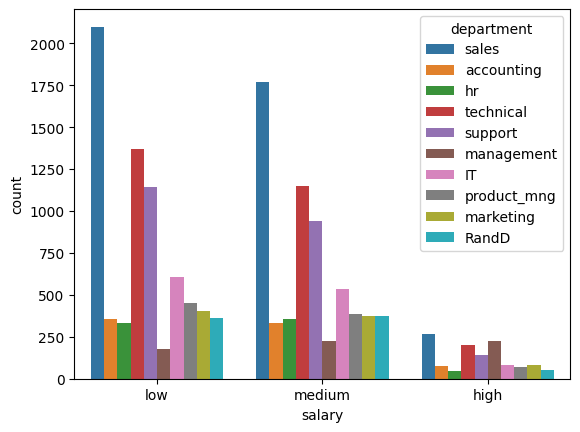

In [14]:
# Визуализируем.

sns.countplot(x='salary', hue='department', data=df);

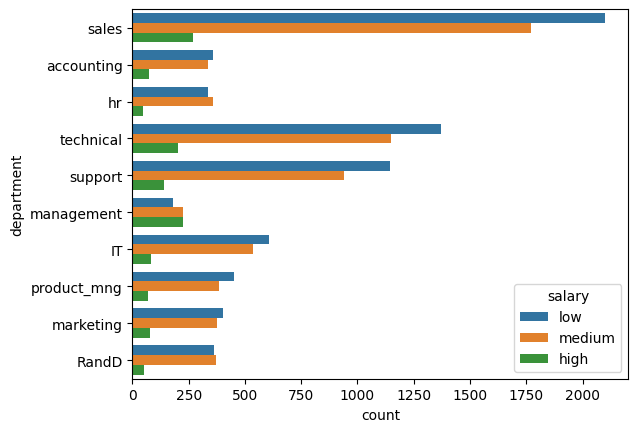

In [15]:
# Визуализируем.

sns.countplot(y='department', hue='salary', data=df);

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

In [16]:
# Посчитаем средние значения среднемесячных часов по группам зарплат.
# На вид, имеем примерно одинаковое среднее значение по часам у всех групп работников.

s = df.groupby(['salary'])['average_montly_hours'].mean()
s

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [17]:
# Выберем работников с низкими зарплатами.

low = df[(df['salary'] == 'low')]
low

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
# Выберем работников с высокими зарплатами.

high = df[(df['salary'] == 'high')]
high

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


In [19]:
# Напишем функцию проверки данных на нормальность, используя тест Шапиро.

def check_normality(data):

    statistic, p = shapiro(data)
    print(f'Статистика = {statistic}, p = {p}')

    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [20]:
# Проверяем группу с низкими зарплатами.

check_normality(low.average_montly_hours)

Статистика = 0.9598619937896729, p = 7.01181725578852e-41
Отклоняем нулевую гипотезу >> Данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
# Проверяем группу с высокими зарплатами.

check_normality(high.average_montly_hours)

Статистика = 0.9712138175964355, p = 5.604931784946058e-15
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [22]:
# # Проверим гипотезу!
# H0: Время работы не зависит от уровня зарплаты.
# H1: Время работы зависит от уровня зарплаты.
# Так как данные распределены не нормально, то будем использовать непараметрические критерии.
# Например, непараметрический критерий Манна-Уитни.

stat, p = mannwhitneyu(low.average_montly_hours, high.average_montly_hours)
print(f'Статистика = {stat:.5f}, p = {p:.5f}')
if p > 0.05:
    print('Не отклоняем нулевую гипотезу. Вероятно время работы не зависит от уровня зарплаты')
else:
    print('Отклоняем нулевую гипотезу. Вероятно время работы зависит от уровня зарплаты')

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу. Вероятно время работы не зависит от уровня зарплаты


**8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [23]:
# Уволенные сотрудники.

dismissed = df[df['left'] == 1]
dismissed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
print(f'Доля уволившихся сотрудников с повышением за последние пять лет = {round((dismissed.promotion_last_5years.sum()*100)/dismissed.left.sum(),2)}% от общего числа уволившихся')

Доля уволившихся сотрудников с повышением за последние пять лет = 0.53% от общего числа уволившихся


In [29]:
share = round((dismissed.promotion_last_5years.sum()*100)/dismissed.left.sum(), 2)
print(f'Доля уволившихся сотрудников с повышением за последние пять лет = {share}% от общего числа уволившихся')

Доля уволившихся сотрудников с повышением за последние пять лет = 0.53% от общего числа уволившихся


In [30]:
print(f'Средняя степень удовлетворенности = {round(dismissed.satisfaction_level.mean(), 2)}')

Средняя степень удовлетворенности = 0.44


In [31]:
mean_satisfaction_level_of_dismissed_employee = round(dismissed.satisfaction_level.mean(), 2)
print(f'Средняя степень удовлетворенности = {mean_satisfaction_level_of_dismissed_employee}')

Средняя степень удовлетворенности = 0.44


In [32]:
print(f'Среднее количество проектов = {round(dismissed.number_project.mean(),2)}')

Среднее количество проектов = 3.86


In [33]:
# Сотрудники в штате.

in_staff = df[df['left'] == 0]
in_staff

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [35]:
share_ = round((in_staff.promotion_last_5years.sum()*100)/in_staff.left.count(), 2)
print(f'Доля сотрудников с повышением за последние пять лет = {share_}% от общего числа уволившихся')

Доля сотрудников с повышением за последние пять лет = 2.63% от общего числа уволившихся


In [36]:
print(f'Средняя степень удовлетворенности = {round(in_staff.satisfaction_level.mean(), 2)}')

Средняя степень удовлетворенности = 0.67


In [37]:
print(f'Среднее количество проектов = {round(in_staff.number_project.mean(),2)}')

Среднее количество проектов = 3.79


**9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки**

Подготовим выборки для обучения модели

In [39]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years']]

In [40]:
y = df['left']

Разделим выборку на тестовую и тренировочную.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Создаем модель.

In [80]:
lda = LinearDiscriminantAnalysis()

Обучаем на тренировочных выборках.

In [81]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Cмотрим коэффициенты.

In [82]:
print(lda.coef_)

[[-4.58366087e+00  6.57019075e-01 -2.18430857e-01  4.47682750e-03
   2.22165799e-01 -1.04525663e+00 -1.10730495e+00]]


Строим предсказание.

In [83]:
predictions = lda.predict(X_test)

In [84]:
print(predictions)

[0 0 0 ... 0 1 0]


In [86]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

Создаем датафрейм с результатами.

In [87]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [89]:
# Дропаем Nan'ы

result.dropna()

,left,Unnamed 0
862,1.0,1.0
3017,0.0,0.0
3087,0.0,1.0
2250,0.0,0.0
542,1.0,0.0
...,...,...
2186,0.0,0.0
1432,1.0,0.0
2174,0.0,0.0
2102,0.0,1.0


Что-то попало, что-то мимо.

Попробуем оценить модель расчётом точности accuracy score.

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Расчёт показал точность в **75,36%**.\

Попробуем оценить, насколько хорошо она работает, используя повторную стратифицированную k-кратную перекрестную проверку.
Например, используя 20 сплитов и 5 повторов:

In [50]:
from sklearn. model_selection import RepeatedStratifiedKFold
from sklearn. model_selection import cross_val_score

In [85]:
# Зададим метод оценки.

cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)

# Оценим модель.

scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7616104672897197


Модель показывает среднюю точность **76,16%**

Попробуем предсказать уволится ли сотрудник на основе новых факторов.

In [78]:
new = [0.18, 0.75, 8, 230, 9, 0, 0]
print(lda.predict([new]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Да, например, с таким уровнем удовлетворения (0,18) - вероятно, уволится.

In [75]:
new_ = [0.98, 0.75, 8, 230, 9, 0, 0]
lda.predict([new_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0])

А вот с уровнем удовлетворенности 0,98 вряд ли.